<a href="https://colab.research.google.com/github/rishabhm4/DeepLearning-task/blob/master/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: Let the Tensors Flow

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from datasets import MNISTDataset

In [0]:
from tensorflow.keras.datasets import mnist

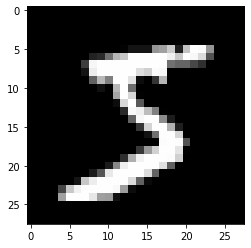

In [0]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

plt.imshow(train_images[0], cmap="Greys_r")

data = MNISTDataset(train_images.reshape([-1, 784]), train_labels, 
                    test_images.reshape([-1, 784]), test_labels,
                    batch_size=128)

### Setting up training

In [0]:
train_steps = 1000
learning_rate = 0.1

### Weights and Baises Initialization

**Do we need to initialize weight with random values**

To answer this question we tested the MLP with and without random weight initialization. The results shows that the MLP will perform only when weights are assigned randomly, else the prediction without random initialization .i.e. 0 assignment as per our results is ~11% accuracy

_Reason_ : Break Symmetry

In [0]:

W= tf.Variable(tf.random.uniform(shape = [784,50], minval=-0.1,maxval=0.1, dtype=tf.float32, seed=42))
b = tf.Variable( tf.random.uniform(shape = [50], minval=-0.1,maxval=0.1, dtype=tf.float32, seed=42))

W1= tf.Variable(tf.random.uniform(shape = [50,10], minval=-0.1,maxval=0.1, dtype=tf.float32, seed=42))
b1 =tf.Variable( tf.random.uniform(shape = [10], minval=-0.1,maxval=0.1, dtype=tf.float32, seed=42))


### Training data

In [0]:
for step in range(train_steps):
    img_batch, lbl_batch = data.next_batch()
    with tf.GradientTape() as tape:
        logits = tf.matmul(tf.nn.relu(tf.matmul(img_batch, W) + b),W1) +b1 
    
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logits, labels=lbl_batch))
        
        
    dW, db, dW1, db1 = tape.gradient(xent, [W, b, W1, b1])    
    
    W.assign_sub(learning_rate * dW)
    b.assign_sub(learning_rate * db)
    W1.assign_sub(learning_rate * dW1)
    b1.assign_sub(learning_rate * db1)
    
        
    if not step % 100:
        preds = tf.argmax(logits, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                             tf.float32))
        print("Loss: {} Accuracy: {}".format(xent, acc))

Loss: 2.328731060028076 Accuracy: 0.09375
Starting new epoch...
Loss: 0.39792025089263916 Accuracy: 0.921875
Loss: 0.3837096095085144 Accuracy: 0.8828125
Loss: 0.5811028480529785 Accuracy: 0.8203125
Loss: 0.3419756293296814 Accuracy: 0.890625
Loss: 0.28436556458473206 Accuracy: 0.9375
Starting new epoch...
Loss: 0.20848271250724792 Accuracy: 0.9453125
Loss: 0.27374231815338135 Accuracy: 0.90625
Loss: 0.3277894854545593 Accuracy: 0.921875
Loss: 0.3091203570365906 Accuracy: 0.90625


### Testing data

In [0]:
test_preds = tf.argmax( tf.matmul(tf.nn.relu(tf.matmul(data.test_data, W) + b),W1) +b1                
                       , axis=1, output_type=tf.int32)
acc1 = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float32))
print(acc1)

tf.Tensor(0.833, shape=(), dtype=float32)


### Accuracy: Different Training Steps

In [0]:
acc5=[]
ts=np.array([500,1000,2000,3000])
for train_steps in ts:
    W= tf.Variable(tf.random.uniform(shape = [784,50], minval=-0.1,maxval=0.1, dtype=tf.float32, seed=10))
    b = tf.Variable( tf.random.uniform(shape = [50], minval=-0.1,maxval=0.1, dtype=tf.float32, seed=10))

    W1= tf.Variable(tf.random.uniform(shape = [50,10], minval=-0.1,maxval=0.1, dtype=tf.float32, seed=10))
    b1 =tf.Variable( tf.random.uniform(shape = [10], minval=-0.1,maxval=0.1, dtype=tf.float32, seed=10))


    for step in range(train_steps):
        img_batch, lbl_batch = data.next_batch()
        with tf.GradientTape() as tape:
            logits = tf.matmul(tf.nn.relu(tf.matmul(img_batch, W) + b),W1) +b1 
            xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logits, labels=lbl_batch))
        
        
        dW, db, dW1, db1 = tape.gradient(xent, [W, b, W1, b1])    
    
        W.assign_sub(learning_rate * dW)
        b.assign_sub(learning_rate * db)
        W1.assign_sub(learning_rate * dW1)
        b1.assign_sub(learning_rate * db1)
    
        
        if not step % 100:
            preds = tf.argmax(logits, axis=1, output_type=tf.int32)
            acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                             tf.float32))
            print("Loss: {} Accuracy: {}".format(xent, acc))
        
        
    test_preds = tf.argmax( tf.matmul(tf.nn.relu(tf.matmul(data.test_data, W) + b),W1) +b1                
                       , axis=1, output_type=tf.int32)
    acc1 = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float32))

    acc5 = np.append(acc5,acc1.numpy())
    
print(acc5)

Loss: 2.3458411693573 Accuracy: 0.1015625
Loss: 0.6229236125946045 Accuracy: 0.8359375
Loss: 0.409920871257782 Accuracy: 0.875
Loss: 0.3185707628726959 Accuracy: 0.890625
Loss: 0.30752742290496826 Accuracy: 0.9296875
Starting new epoch...
Loss: 2.2861196994781494 Accuracy: 0.125
Loss: 0.6598182320594788 Accuracy: 0.8515625
Loss: 0.5465779304504395 Accuracy: 0.8671875
Loss: 0.4870196580886841 Accuracy: 0.859375
Loss: 0.32970714569091797 Accuracy: 0.890625
Starting new epoch...
Loss: 0.3010375499725342 Accuracy: 0.9453125
Loss: 0.3434561491012573 Accuracy: 0.90625
Loss: 0.2714468240737915 Accuracy: 0.9140625
Loss: 0.228459894657135 Accuracy: 0.953125
Loss: 0.24414145946502686 Accuracy: 0.9140625
Starting new epoch...
Loss: 2.3111343383789062 Accuracy: 0.1328125
Loss: 0.6714768409729004 Accuracy: 0.875
Loss: 0.37636178731918335 Accuracy: 0.90625
Loss: 0.32011497020721436 Accuracy: 0.8984375
Starting new epoch...
Loss: 0.2712978720664978 Accuracy: 0.9453125
Loss: 0.27122998237609863 Accura

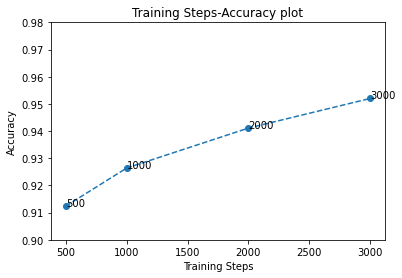

In [0]:
plt.plot(ts,acc5,marker='o',linestyle='dashed')
plt.xlabel("Training Steps")
plt.ylabel("Accuracy")
plt.ylim(.90,.98)
plt.title("Training Steps-Accuracy plot")
for i, txt in enumerate(ts):
    plt.annotate(txt,(ts[i],acc5[i]))

### Accuracy: Different Learning rate

We used the following Learning rates: 0.1, 0.01, 0.001, 0.0001

In [0]:
acc3=[]
lr=np.array([0.1,0.01,0.001,0.0001])
for learning_rate in lr:
    W= tf.Variable(tf.random.uniform(shape = [784,50], minval=-0.1,maxval=0.1, dtype=tf.float32, seed=10))
    b = tf.Variable( tf.random.uniform(shape = [50], minval=-0.1,maxval=0.1, dtype=tf.float32, seed=10))

    W1= tf.Variable(tf.random.uniform(shape = [50,10], minval=-0.1,maxval=0.1, dtype=tf.float32, seed=10))
    b1 =tf.Variable( tf.random.uniform(shape = [10], minval=-0.1,maxval=0.1, dtype=tf.float32, seed=10))


    for step in range(train_steps):
        img_batch, lbl_batch = data.next_batch()
        with tf.GradientTape() as tape:
            logits = tf.matmul(tf.nn.relu(tf.matmul(img_batch, W) + b),W1) +b1 
            xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logits, labels=lbl_batch))
        
        
        dW, db, dW1, db1 = tape.gradient(xent, [W, b, W1, b1])    
    
        W.assign_sub(learning_rate * dW)
        b.assign_sub(learning_rate * db)
        W1.assign_sub(learning_rate * dW1)
        b1.assign_sub(learning_rate * db1)
    
        
        if not step % 100:
            preds = tf.argmax(logits, axis=1, output_type=tf.int32)
            acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                             tf.float32))
            print("Loss: {} Accuracy: {}".format(xent, acc))
        
        
    test_preds = tf.argmax( tf.matmul(tf.nn.relu(tf.matmul(data.test_data, W) + b),W1) +b1                
                       , axis=1, output_type=tf.int32)
    acc1 = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float32))

    acc3 = np.append(acc3,acc1.numpy())
    
print(acc3)

Loss: 2.319606065750122 Accuracy: 0.0625
Starting new epoch...
Loss: 0.7214456796646118 Accuracy: 0.78125
Loss: 0.40193381905555725 Accuracy: 0.875
Loss: 0.3655748963356018 Accuracy: 0.890625
Loss: 0.32726240158081055 Accuracy: 0.8828125
Starting new epoch...
Loss: 0.40029388666152954 Accuracy: 0.890625
Loss: 0.23018306493759155 Accuracy: 0.9453125
Loss: 0.3189260959625244 Accuracy: 0.90625
Loss: 0.26737532019615173 Accuracy: 0.9140625
Loss: 0.40616801381111145 Accuracy: 0.9140625
Starting new epoch...
Loss: 2.3408000469207764 Accuracy: 0.0625
Loss: 2.174318552017212 Accuracy: 0.3125
Loss: 1.940419316291809 Accuracy: 0.5703125
Loss: 1.6202540397644043 Accuracy: 0.671875
Loss: 1.3645085096359253 Accuracy: 0.6875
Starting new epoch...
Loss: 1.1392710208892822 Accuracy: 0.765625
Loss: 1.0640368461608887 Accuracy: 0.7578125
Loss: 0.8178439140319824 Accuracy: 0.8203125
Loss: 0.7772797346115112 Accuracy: 0.8125
Starting new epoch...
Loss: 0.6884652972221375 Accuracy: 0.8125
Loss: 2.332791090

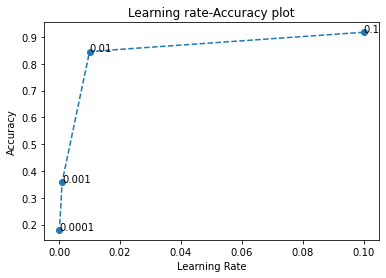

In [0]:
plt.plot(lr,acc3,marker='o',linestyle='dashed')
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.title("Learning rate-Accuracy plot")
for i, txt in enumerate(lr):
    plt.annotate(txt,(lr[i],acc3[i]))

### Accuracy: Different Combinations - Weights and Baises

- W1,b1 = [784,50] W,b = [50,10]     - Accuracy = 92.78%
- W1,b1 = [784,100] W,b = [100,10]   - Accuracy = 93.06%
- W1,b1 = [784,200] W,b = [200,10]   - Accuracy = 93.31%
- W1,b1 = [784,300] W,b = [300,10]   - Accuracy = 93.47%


In [0]:
y = np.array([0.9278,0.9306,0.9331,0.9347]) *100
x= np.array([1,2,3,4])

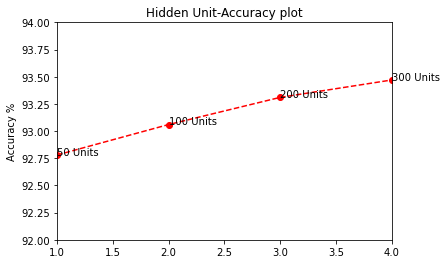

In [0]:
plt.plot(x,y,marker='o',linestyle='dashed',color="red")

plt.ylim(92,94)
plt.xlim(1,4)
plt.ylabel("Accuracy %")
plt.title("Hidden Unit-Accuracy plot")
for i,txt in enumerate(["50 Units","100 Units","200 Units","300 Units"]):
    plt.annotate(txt,(x[i],y[i]))

### Accuracy: Different Activation Functions - In Hidden Layers
- Relu: 92.78%
- Leaky Relu: 92.41%
- Tanh: 92.57%

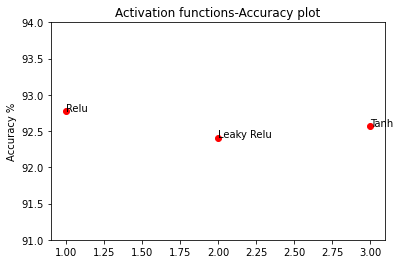

In [0]:
y = [92.78,92.41,92.57]
x = [1,2,3]

plt.subplots()
plt.scatter(x,y,color='red')
plt.ylim(91,94)
plt.ylabel("Accuracy %")
plt.title("Activation functions-Accuracy plot")
n = ["Relu","Leaky Relu","Tanh"]
for i,txt in enumerate(n):
    plt.annotate(txt,(x[i],y[i]))

### Accuracy: Layers
We used 2, 4, 6 and 8 hidden layers to test accuracy

Text(0.5, 0, 'No. of Hidden layers')

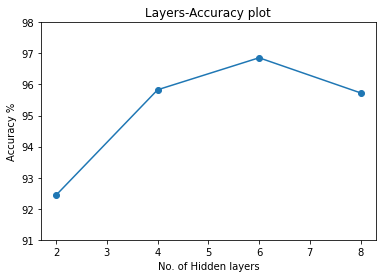

In [0]:
Accuracy= np.array([.9244 ,  .9583 , .9686,  .9573 ]) * 100
Layers= np.array([2, 4, 6, 8])
plt.plot(Layers,Accuracy,marker="o")
plt.ylim([91,98])
plt.title("Layers-Accuracy plot")
plt.ylabel("Accuracy %")
plt.xlabel("No. of Hidden layers")


## Using Zalando fashion dataset

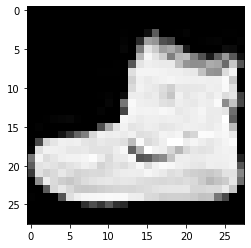

In [0]:
from tensorflow.keras.datasets import fashion_mnist
mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

plt.imshow(train_images[0], cmap="Greys_r")

data = MNISTDataset(train_images.reshape([-1, 784]), train_labels, 
                    test_images.reshape([-1, 784]), test_labels,
                    batch_size=128)

In [0]:
train_steps = 1000
learning_rate = 0.1
W= tf.Variable(tf.random.uniform(shape = [784,50], minval=-0.1,maxval=0.1, dtype=tf.float32, seed=42))
b = tf.Variable( tf.random.uniform(shape = [50], minval=-0.1,maxval=0.1, dtype=tf.float32, seed=42))

W1= tf.Variable(tf.random.uniform(shape = [50,10], minval=-0.1,maxval=0.1, dtype=tf.float32, seed=42))
b1 =tf.Variable( tf.random.uniform(shape = [10], minval=-0.1,maxval=0.1, dtype=tf.float32, seed=42))


In [0]:
for step in range(train_steps):
    img_batch, lbl_batch = data.next_batch()
    with tf.GradientTape() as tape:
        logits = tf.matmul(tf.nn.relu(tf.matmul(img_batch, W) + b),W1) +b1 
    
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logits, labels=lbl_batch))
        
        
    dW, db, dW1, db1 = tape.gradient(xent, [W, b, W1, b1])    
    
    W.assign_sub(learning_rate * dW)
    b.assign_sub(learning_rate * db)
    W1.assign_sub(learning_rate * dW1)
    b1.assign_sub(learning_rate * db1)
    
        
    if not step % 100:
        preds = tf.argmax(logits, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                             tf.float32))
        print("Loss: {} Accuracy: {}".format(xent, acc))

Loss: 2.2936792373657227 Accuracy: 0.0703125
Loss: 0.9000065326690674 Accuracy: 0.703125
Loss: 0.8092596530914307 Accuracy: 0.7421875
Loss: 0.618045449256897 Accuracy: 0.765625
Loss: 0.6117556095123291 Accuracy: 0.7578125
Starting new epoch...
Loss: 0.5066136121749878 Accuracy: 0.796875
Loss: 0.591576099395752 Accuracy: 0.765625
Loss: 0.42253533005714417 Accuracy: 0.8515625
Loss: 0.5823190808296204 Accuracy: 0.765625
Loss: 0.36176598072052 Accuracy: 0.8515625
Starting new epoch...


In [0]:
test_preds = tf.argmax( tf.matmul(tf.nn.relu(tf.matmul(data.test_data, W) + b),W1) +b1                
                       , axis=1, output_type=tf.int32)
acc1 = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float32))
print(acc1)

tf.Tensor(0.833, shape=(), dtype=float32)


# Thank You